In [5]:
from hydroDL.data import dbBasin, usgs, gageII, gridMET, GLASS
import os
from hydroDL import kPath
import numpy as np
import pandas as pd
from hydroDL.post import axplot, figplot, mapplotFlat
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime as dt

sn = 1e-5
code = '00955'
dataName = '{}-B200'.format(code)
DF = dbBasin.DataFrameBasin(dataName)


meanC = np.nanmean(DF.c, axis=0)
lat, lon = DF.getGeo()

tpd = pd.to_datetime(DF.t)
day = tpd.dayofyear
year = tpd.year
logQ = np.log(DF.q[:, :, 1] + sn)

Find negative Q, filled zero
9 extremes removed
loading data 00955-B200 0.65s


In [6]:

# local feature image range
nC = 50
nQ = 50
nD = 50
binD = np.linspace(1, 365, nD + 1)
imgLst1 = list()
imgLst2 = list()
extLst1 = list()
extLst2 = list()
for k, siteNo in enumerate(DF.siteNoLst):
    c = DF.c[:, k, 0]
    q = logQ[:, k]
    binC = np.linspace(np.nanmin(c), np.nanmax(c), num=nC + 1)
    binQ = np.linspace(np.nanmin(q), np.nanmax(q), num=nQ + 1)
    extent1 = [binD[0], binD[-1], binC[0], binC[-1]]
    extent2 = [binQ[0], binQ[-1], binC[0], binC[-1]]
    img1 = np.histogram2d(day, DF.c[:, k, 0], bins=[binD, binC], density=True)[0]
    img1 = img1.swapaxes(0, 1)
    img2 = np.histogram2d(logQ[:, k], DF.c[:, k, 0], bins=[binQ, binC], density=True)[0]
    img2 = img2.swapaxes(0, 1)
    imgLst1.append(img1)
    imgLst2.append(img2)
    extLst1.append(extent1)
    extLst2.append(extent2)
imgAry1 = np.stack(imgLst1, axis=-1)
imgAry2 = np.stack(imgLst2, axis=-1)

In [7]:

# CQ CT plot to image
def funcM():
    figM = plt.figure(figsize=(8, 6))
    gsM = gridspec.GridSpec(1, 1)
    axM = mapplotFlat.mapPoint(figM, gsM[0, 0], lat, lon, meanC)
    axM.set_title('{} {}'.format(usgs.codePdf.loc[code]['shortName'], code))
    figP = plt.figure(figsize=(10, 8))
    gsP = gridspec.GridSpec(2, 4)
    axT1 = figP.add_subplot(gsP[0, :])
    axT2 = axT1.twinx()
    axP1 = figP.add_subplot(gsP[1, 0])
    axP2 = figP.add_subplot(gsP[1, 1])
    axP3 = figP.add_subplot(gsP[1, 2])
    axP4 = figP.add_subplot(gsP[1, 3])
    axPLst = [axT1, axT2, axP1, axP2, axP3, axP4]
    axP = np.array(axPLst)
    return figM, axM, figP, axP, lon, lat


def funcP(iP, axP):
    print(iP)
    [axT1, axT2, axP1, axP2, axP3, axP4] = axP
    axT1.plot(DF.t, DF.c[:, iP, 0], 'r*')
    axT2.plot(DF.t, DF.q[:, iP, 1], 'b-')
    axP1.scatter(day, DF.c[:, iP, 0], c=year)
    axP2.imshow(imgAry1[:, :, iP], origin='lower', extent=extLst1[iP], aspect='auto')
    axP3.scatter(logQ[:, iP], DF.c[:, iP, 0], c=year)
    axP4.imshow(imgAry2[:, :, iP], origin='lower', extent=extLst2[iP], aspect='auto')



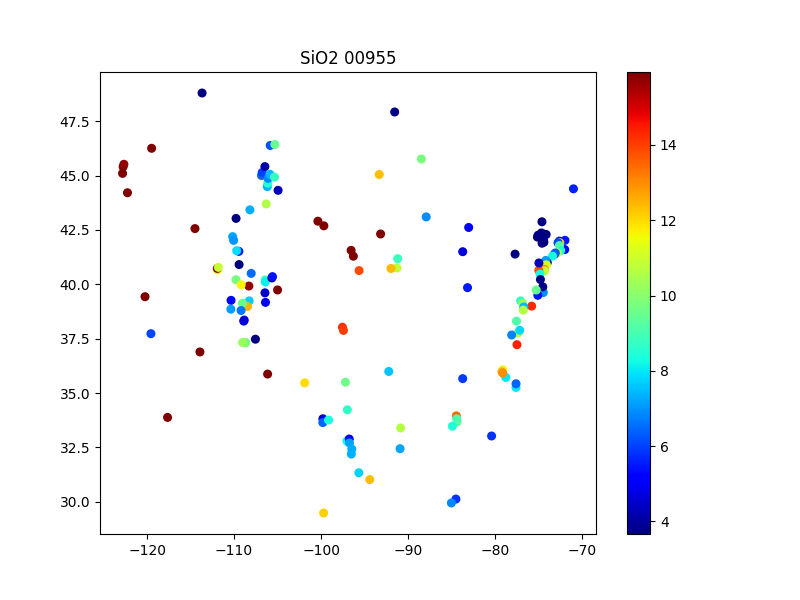

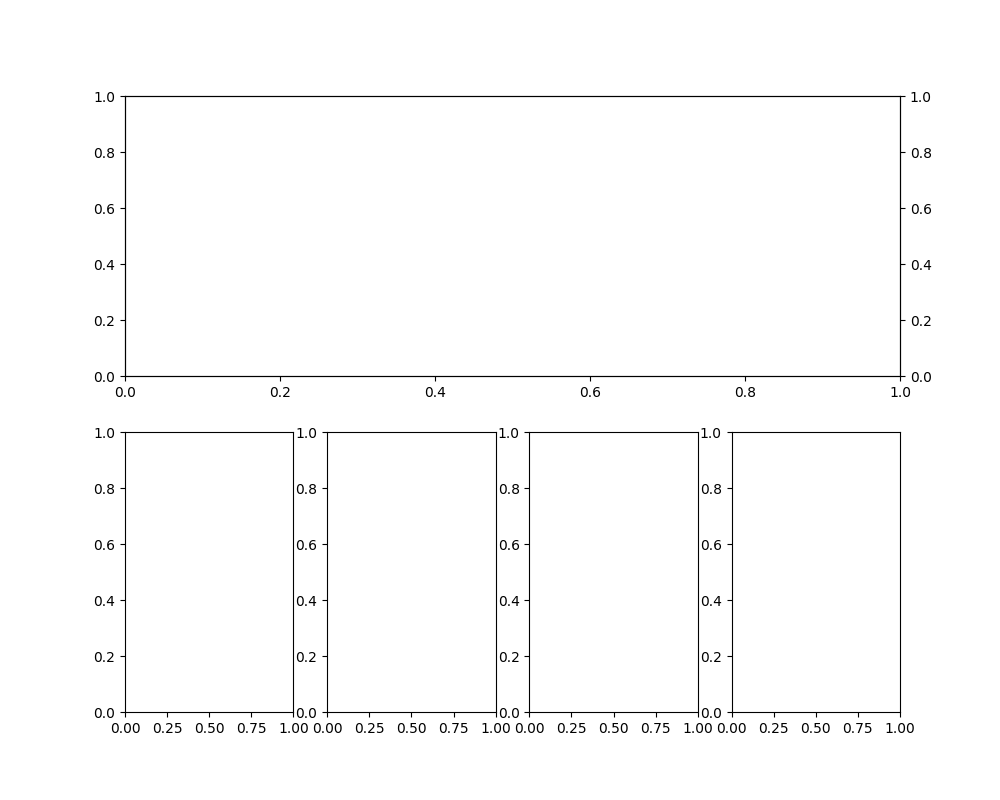

(<Figure size 800x600 with 2 Axes>, <Figure size 1000x800 with 6 Axes>)

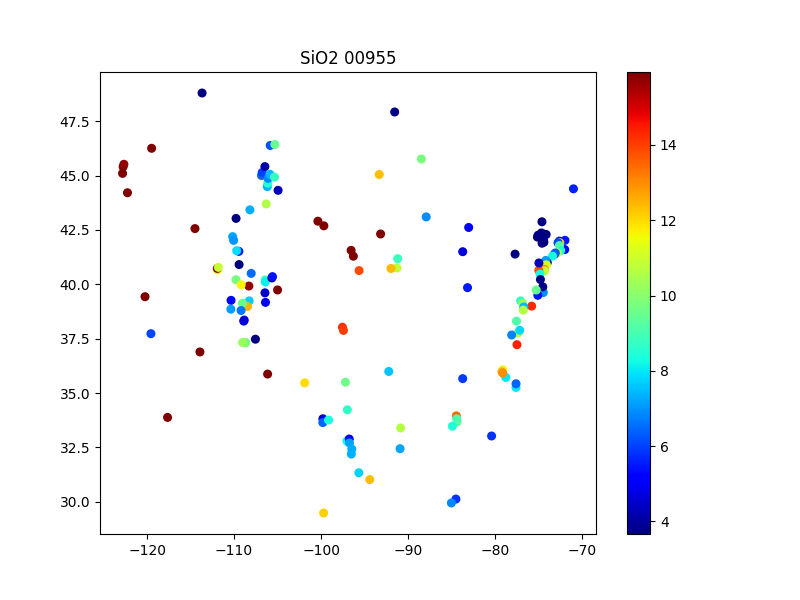

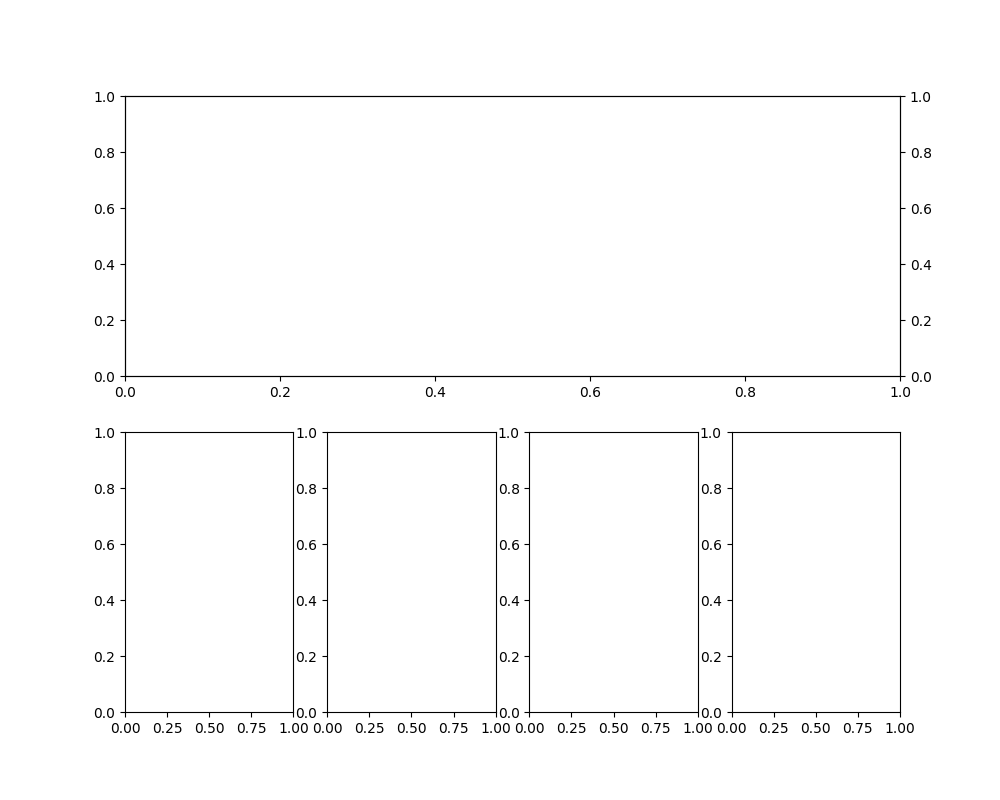

In [9]:
%matplotlib widget
figplot.clickMap(funcM, funcP)